---
title: Fashion MNIST
categories: deep-learning
date: 2020-12-15
---


数据集State-of-the-Art详见

- [mnist](https://paperswithcode.com/sota/image-classification-on-mnist)
- [fashion-mnist](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)
- [cifar-10](https://paperswithcode.com/sota/image-classification-on-cifar-10)

## 初始化

首先引入所用的包。然后是一些公共函数。下面代码比较长，可以先把函数的中文解释看过就好，细节忽略，后面用到再回来看。

In [1]:
import sys
from tensorflow.keras import Model, layers, regularizers, preprocessing

base_path = '/tf/eipi10/xuxiangwen.github.io/_notes/05-ai/54-tensorflow/code'
sys.path.append(base_path)

from image_classification import set_gpu_memory, lr_schedule, image_data_generator 
from image_classification import ImageClassificationHelper, ImageDataset

set_gpu_memory(1024)
model_results={}

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

# #当module有新的方法的时候，需要运行下面方法。
# %reload_ext autoreload

set max gpu memory to 1024


下面初始化模型运行的参数。

In [2]:
params = {
    'dataset_name': 'cifar10',
    'validation_percent': 0,    
    'use_data_augmentation': False,
    'augmentation_generator': image_data_generator(),   
    'batch_size': 32,    
    'epochs': 120,    
    'learning_rate':0.001,
    'dropout':0.1,
    'metrics':['accuracy'], 
    'use_lr_schedule': False,
    'lr_schedule': lr_schedule,
    'model_params':{
        'mlp':{'dropout':0.1},
        'lenet':{'dropout':0.2},
        'custom':{'dropout':0.2},
        'vgg':{'dropout':0.4},
        'resnet':{}
    }
}

helper = ImageClassificationHelper()
helper.set_params(params)
helper.set_model_results(model_results)
helper.set_data(ImageDataset(params))

load cifar10 data from source
train: (50000, 32, 32, 3) (50000,)
test: (10000, 32, 32, 3) (10000,)
create train, validation and test dataset


## 数据

MNIST数据集包含60,000张training图片和10,000张test图片，每张图片由$28\times28$ 个像素点构成，每个像素点用一个灰度值(0−255)表示。下面查看一下其中的图片。

In [3]:
helper.data.classes

['plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

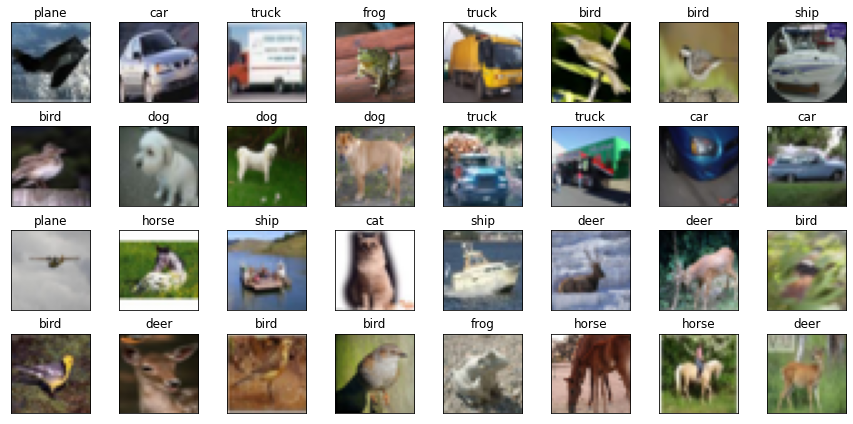

In [4]:
images, labels = iter(helper.data.train_dataset).next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

然后看看做了data augmentation的图片。

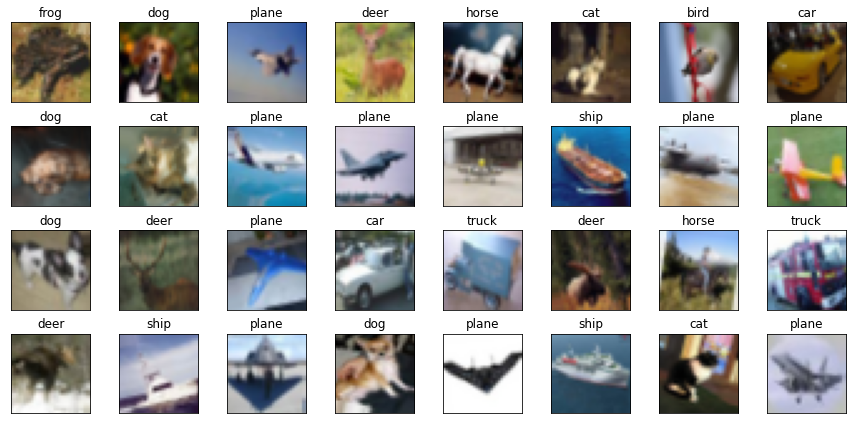

In [5]:
images, labels = helper.data.train_dataset_aug.next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

下面来看看各个class的数据分布。可以看到各个数字的分布还是比较均匀的。

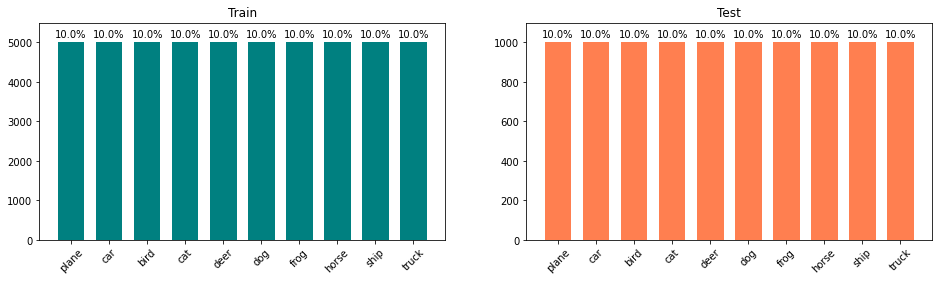

In [6]:
helper.plot_distribution()

## MLP

In [7]:
def get_mlp(helper, name='mlp', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Flatten()(input)
    x = layers.Dense(128, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model

model = get_mlp(helper)
model.summary()

dropout=0.1
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/mlp/checkpoint
Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________




下面来训练模型。

2020-12-25 13:44:11,108: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.9943 - accuracy: 0.2549 - val_loss: 1.8805 - val_accuracy: 0.3054
Epoch 2/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.9095 - accuracy: 0.2914 - val_loss: 1.8798 - val_accuracy: 0.3056
Epoch 3/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8774 - accuracy: 0.3116 - val_loss: 1.8195 - val_accuracy: 0.3376
Epoch 4/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8562 - accuracy: 0.3218 - val_loss: 1.7838 - val_accuracy: 0.3536
Epoch 5/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8435 - accuracy: 0.3260 - val_loss: 1.7829 - val_accuracy: 0.3583
Epoch 6/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8306 - accuracy: 0.3324 - val_loss: 1.8202 - val_accuracy: 0.3333
Epoch 7/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8258

Epoch 55/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7402 - accuracy: 0.3763 - val_loss: 1.7149 - val_accuracy: 0.3900
Epoch 56/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7391 - accuracy: 0.3753 - val_loss: 1.7163 - val_accuracy: 0.3858
Epoch 57/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7390 - accuracy: 0.3735 - val_loss: 1.7159 - val_accuracy: 0.3832
Epoch 58/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7380 - accuracy: 0.3770 - val_loss: 1.7169 - val_accuracy: 0.3850
Epoch 59/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7389 - accuracy: 0.3767 - val_loss: 1.7162 - val_accuracy: 0.3858
Epoch 60/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7406 - accuracy: 0.3750 - val_loss: 1.7165 - val_accuracy: 0.3825
Epoch 61/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7423 - accuracy: 0.3755 - val_loss: 1.7216 -

2020-12-25 13:51:35,622: INFO: finish training [elapsed time: 444.51 seconds]


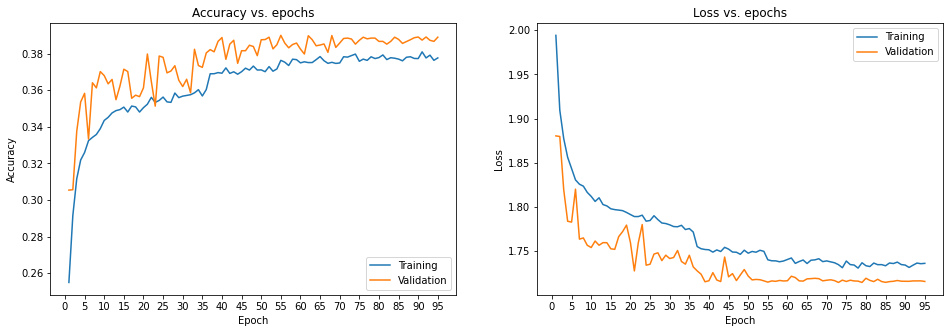

In [8]:
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:1.7149, Test Accuracy:39.00%
---------------------------------------- confusion matrix ----------------------------------------


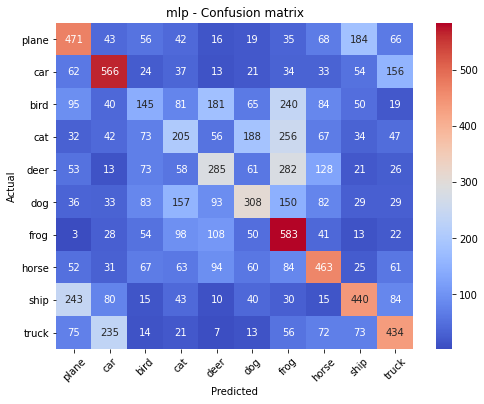

---------------------------------------- model improvement ----------------------------------------


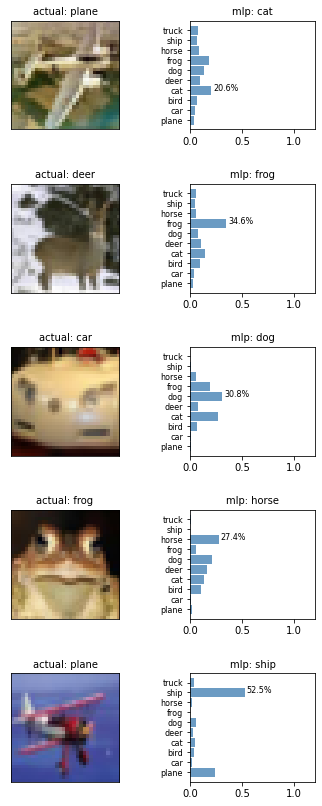

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
mlp,1.661307,0.4071,1.714949,0.39,394634,444.0


In [9]:
helper.model_summary(model, history=history)




从上面的错误来看，模型对一些细节的判断不是很准。下面来尝试一下LeNet。

## LeNet

![image-20201019113632136](images/image-20201019113632136.png)

LeNet诞生于1994年，是Yann LeCun等人提出的，是最早的卷积神经网络之一。在LeNet中，输入层是32×32的图片，而MNIST是28×28的图片，为了保持模型的结构不变，在第一个Conv2D设置参数padding=’same’。首先创建模型，并训练。

In [10]:
def get_lenet(helper, name='lenet', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(6, (5, 5), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(16, (5, 5), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(84, activation='relu')(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)  

    return model    

# 创建模型
model = get_lenet(helper)
model.summary()

dropout=0.2
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/lenet/checkpoint
Model: "lenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
________________________________________



下面来训练模型。

2020-12-25 13:51:45,162: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.7619 - accuracy: 0.3640 - val_loss: 1.4705 - val_accuracy: 0.4654
Epoch 2/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.4735 - accuracy: 0.4731 - val_loss: 1.3355 - val_accuracy: 0.5278
Epoch 3/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.3657 - accuracy: 0.5143 - val_loss: 1.3898 - val_accuracy: 0.5085
Epoch 4/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.2778 - accuracy: 0.5478 - val_loss: 1.1976 - val_accuracy: 0.5754
Epoch 5/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.2164 - accuracy: 0.5676 - val_loss: 1.0805 - val_accuracy: 0.6213
Epoch 6/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.1684 - accuracy: 0.5881 - val_loss: 1.0987 - val_accuracy: 0.6093
Epoch 7/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.1275

Epoch 56/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7518 - accuracy: 0.7353 - val_loss: 0.7832 - val_accuracy: 0.7295
Epoch 57/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7550 - accuracy: 0.7346 - val_loss: 0.8359 - val_accuracy: 0.7140
Epoch 58/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7485 - accuracy: 0.7362 - val_loss: 0.8003 - val_accuracy: 0.7247
Epoch 59/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7505 - accuracy: 0.7372 - val_loss: 0.8158 - val_accuracy: 0.7151
Epoch 60/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7423 - accuracy: 0.7378 - val_loss: 0.8351 - val_accuracy: 0.7134
Epoch 61/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7483 - accuracy: 0.7372 - val_loss: 0.7824 - val_accuracy: 0.7301
Epoch 62/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7483 - accuracy: 0.7375 - val_loss: 0.7826 -

2020-12-25 14:03:50,552: INFO: finish training [elapsed time: 725.39 seconds]


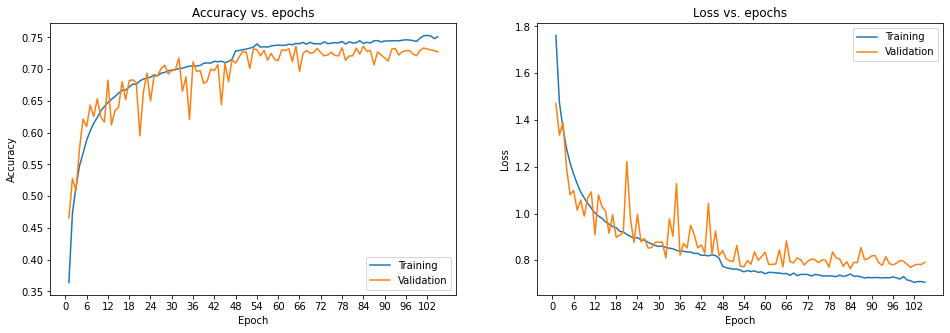

In [11]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)



下面来评估模型并和mlp模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.7716, Test Accuracy:73.60%
---------------------------------------- confusion matrix ----------------------------------------


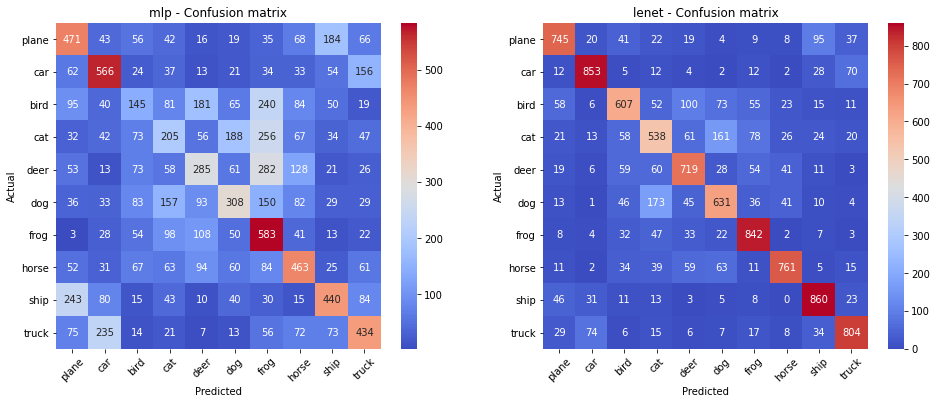

---------------------------------------- model improvement ----------------------------------------


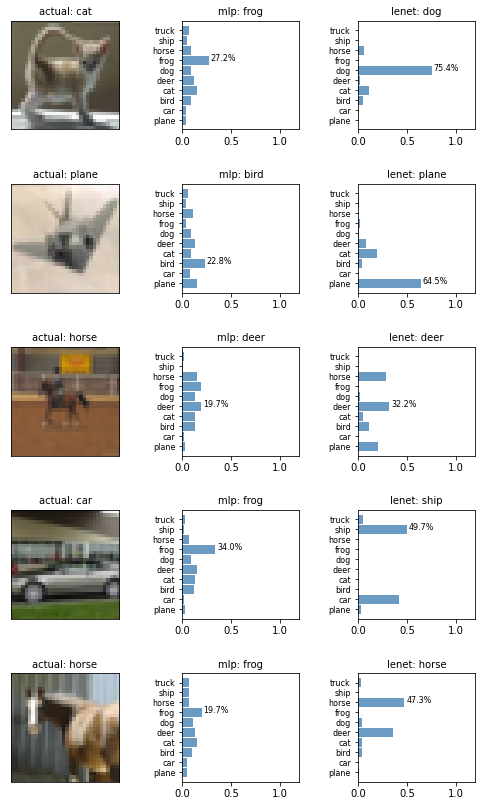

---------------------------------------- error analysis ----------------------------------------


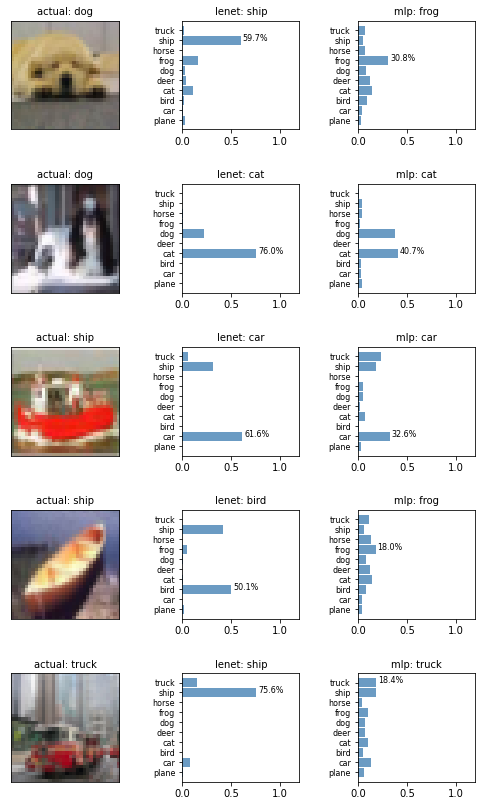

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
lenet,0.462399,0.8471,0.771559,0.736,83170,725.0
mlp,1.661307,0.4071,1.714949,0.390,394634,444.0


In [12]:
helper.model_summary(model, history=history)



从上面的图中，可以看到，Lenet的参数只有mlp的60%，但其的准确率比mlp提升了差不多1%。上面最后一张图中，有三列，第一列是数字图片，它们是mlp中分错的数字，第二列是mlp中的分类，第三列是lenet中的分类，可以看到lenet的确学到了一些mlp中没有的模式。下面再来看看哪些数字在lenet也分错了。


上图中，可以看到对于部分数字的识别，mlp甚至要更好一点啊，还有一些数字，则是一起都错了。

## Custom 1

下面自己定义一个模型，这个模型和lenet的主要区别是，增加了卷积的深度。

In [13]:
def get_custom1(helper, name='custom_cnn', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x) 
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)  
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model   

# 创建模型
model = get_custom1(helper)
model.summary()

dropout=0.2
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/custom_cnn/checkpoint
Model: "custom_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
______________________________


可以发现参数的个数已经和mlp差不多了，下面来训练模型。

2020-12-25 14:04:06,429: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
1562/1562 [==============================] - 7s 5ms/step - loss: 1.6236 - accuracy: 0.4129 - val_loss: 1.3117 - val_accuracy: 0.5349
Epoch 2/120
1562/1562 [==============================] - 7s 4ms/step - loss: 1.2902 - accuracy: 0.5395 - val_loss: 1.2051 - val_accuracy: 0.5647
Epoch 3/120
1562/1562 [==============================] - 7s 4ms/step - loss: 1.1562 - accuracy: 0.5881 - val_loss: 1.0353 - val_accuracy: 0.6298
Epoch 4/120
1562/1562 [==============================] - 7s 4ms/step - loss: 1.0713 - accuracy: 0.6229 - val_loss: 1.0799 - val_accuracy: 0.6165
Epoch 5/120
1562/1562 [==============================] - 7s 4ms/step - loss: 1.0144 - accuracy: 0.6432 - val_loss: 0.9482 - val_accuracy: 0.6659
Epoch 6/120
1562/1562 [==============================] - 7s 4ms/step - loss: 0.9719 - accuracy: 0.6605 - val_loss: 1.0317 - val_accuracy: 0.6428
Epoch 7/120
1562/1562 [==============================] - 7s 4ms/step - loss: 0.9336

Epoch 56/120
1562/1562 [==============================] - 8s 5ms/step - loss: 0.5831 - accuracy: 0.7933 - val_loss: 0.5800 - val_accuracy: 0.8019
Epoch 57/120
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5838 - accuracy: 0.7955 - val_loss: 0.5895 - val_accuracy: 0.7969
Epoch 58/120
1562/1562 [==============================] - 8s 5ms/step - loss: 0.5774 - accuracy: 0.7944 - val_loss: 0.5988 - val_accuracy: 0.7918
Epoch 59/120
1562/1562 [==============================] - 8s 5ms/step - loss: 0.5743 - accuracy: 0.7980 - val_loss: 0.6261 - val_accuracy: 0.7841
Epoch 60/120
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5741 - accuracy: 0.7984 - val_loss: 0.5956 - val_accuracy: 0.7966
Epoch 61/120
1562/1562 [==============================] - 8s 5ms/step - loss: 0.5699 - accuracy: 0.8002 - val_loss: 0.5998 - val_accuracy: 0.7965
Epoch 62/120
1562/1562 [==============================] - 8s 5ms/step - loss: 0.5680 - accuracy: 0.7988 - val_loss: 0.6321 -

Epoch 110/120
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5275 - accuracy: 0.8137 - val_loss: 0.5765 - val_accuracy: 0.8059
Epoch 111/120
1562/1562 [==============================] - 8s 5ms/step - loss: 0.5268 - accuracy: 0.8158 - val_loss: 0.5771 - val_accuracy: 0.8033
Epoch 112/120
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5239 - accuracy: 0.8153 - val_loss: 0.5764 - val_accuracy: 0.8037
Epoch 113/120
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5232 - accuracy: 0.8146 - val_loss: 0.5737 - val_accuracy: 0.8051
Epoch 114/120
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5263 - accuracy: 0.8166 - val_loss: 0.5746 - val_accuracy: 0.8056
Epoch 115/120
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5288 - accuracy: 0.8135 - val_loss: 0.5747 - val_accuracy: 0.8036
Epoch 116/120
1562/1562 [==============================] - 8s 5ms/step - loss: 0.5292 - accuracy: 0.8120 - val_loss: 0

2020-12-25 14:20:47,560: INFO: finish training [elapsed time: 1001.13 seconds]


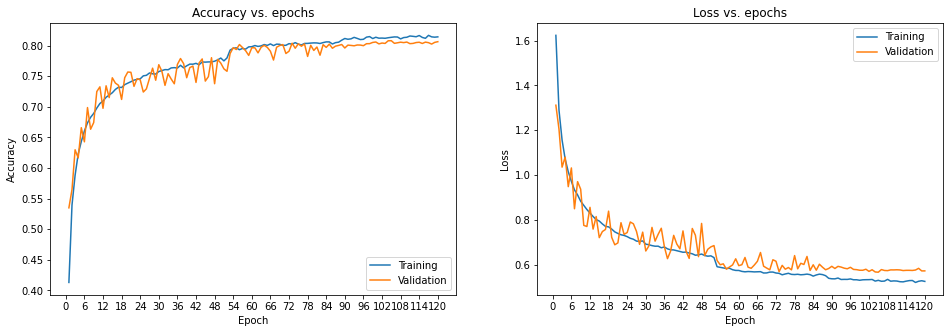

In [14]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)



下面来评估模型并和lenet模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.5663, Test Accuracy:80.81%
---------------------------------------- confusion matrix ----------------------------------------


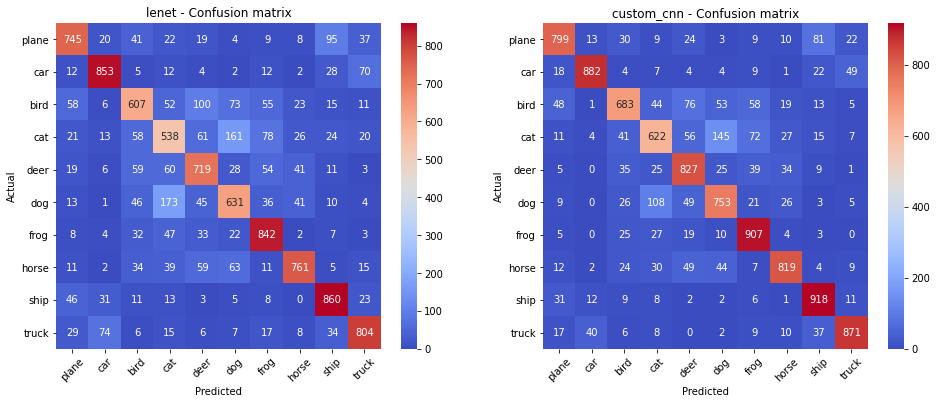

---------------------------------------- model improvement ----------------------------------------


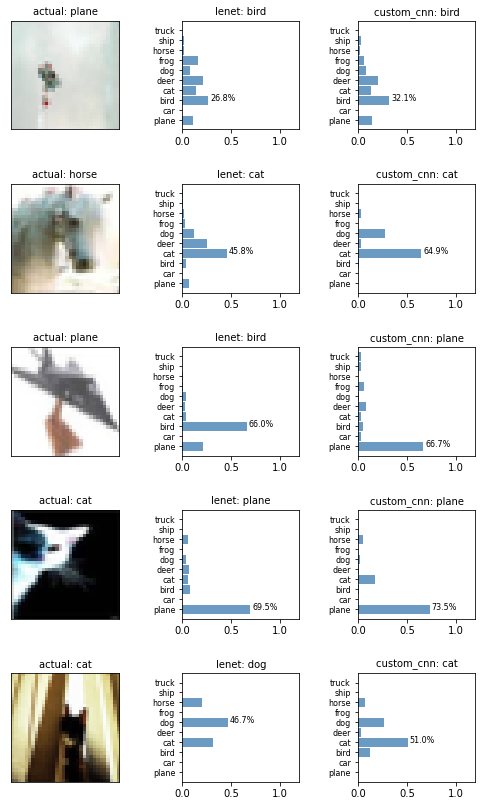

---------------------------------------- error analysis ----------------------------------------


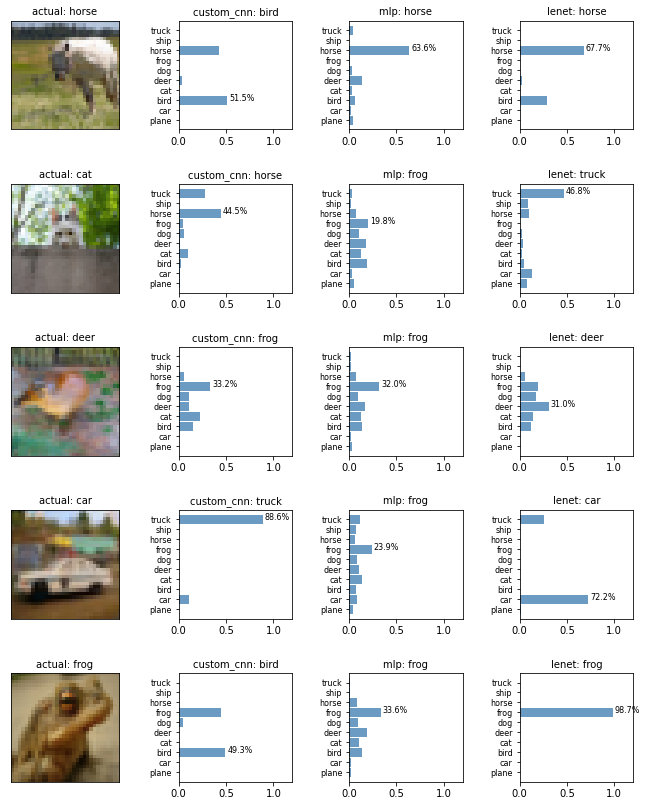

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
custom_cnn,0.278233,0.9089,0.566326,0.8081,73738,1001.0
lenet,0.462399,0.8471,0.771559,0.7360,83170,725.0
mlp,1.661307,0.4071,1.714949,0.3900,394634,444.0


In [15]:
helper.model_summary(model, history=history)



可以看到custom1模型的效果比lenet有些许提升（经过多次测试，平均好0.1-0.3个百分点）。上面最后一幅图，也能看到custom1模型学习到了不少新的模式。下面来看错误分析。

## VGG

In [16]:
def get_block(x, filters, conv_count, kernel_size=(3, 3), padding='same', use_bn=True, dropout=0, block_name='block'):
    for i in range(conv_count):
        x = layers.Conv2D(filters, kernel_size, padding=padding, name='{}_con{}'.format(block_name, i+1))(x)
        if use_bn: x = layers.BatchNormalization(name='{}_bn{}'.format(block_name, i+1))(x)
        x = layers.ReLU(name='{}_relu{}'.format(block_name, i+1))(x)
    x = layers.MaxPooling2D((2, 2), name='{}_maxpooling1'.format(block_name))(x)
    if dropout>0: x = layers.Dropout(dropout, name='{}_dropout1'.format(block_name))(x)
    return x
    
def get_vgg(helper, name='vgg',
              dense_layer_count=1, 
              dense_layer_units=128,
              conv_filters=64,
              block_count=3,
              use_bn=True,
              dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = input    
    for i in range(block_count): 
        x = get_block(x, conv_filters, conv_count=2, use_bn=use_bn, dropout=dropout, 
                      block_name='block{}'.format(i+1))
        conv_filters = conv_filters*2
                    
    x = layers.Flatten()(x)
    for i in range(dense_layer_count):
        x = layers.Dense(128, activation='relu')(x)
        if dropout>0: x = layers.Dropout(dropout)(x)    
    x = layers.Dense(10)(x)
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model


model = get_vgg(helper, dense_layer_count=1, block_count=3, name='vgg8')
model.summary()



dropout=0.4
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/vgg8/checkpoint
Model: "vgg8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_con1 (Conv2D)         (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_bn1 (BatchNormalizati (None, 32, 32, 64)        256       
_________________________________________________________________
block1_relu1 (ReLU)          (None, 32, 32, 64)        0         
_________________________________________________________________
block1_con2 (Conv2D)         (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_bn2 (BatchNormalizati (None, 32, 32, 64)        256       
__________________________________________

2020-12-25 14:21:05,553: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
1562/1562 [==============================] - 20s 13ms/step - loss: 2.0605 - accuracy: 0.1753 - val_loss: 1.8087 - val_accuracy: 0.2872
Epoch 2/120
1562/1562 [==============================] - 19s 12ms/step - loss: 1.9385 - accuracy: 0.2126 - val_loss: 1.7613 - val_accuracy: 0.3299
Epoch 3/120
1562/1562 [==============================] - 19s 12ms/step - loss: 1.8925 - accuracy: 0.2345 - val_loss: 1.6236 - val_accuracy: 0.3770
Epoch 4/120
1562/1562 [==============================] - 19s 12ms/step - loss: 1.8471 - accuracy: 0.2621 - val_loss: 1.9661 - val_accuracy: 0.3107
Epoch 5/120
1562/1562 [==============================] - 19s 12ms/step - loss: 1.7363 - accuracy: 0.3148 - val_loss: 1.4307 - val_accuracy: 0.4740
Epoch 6/120
1562/1562 [==============================] - 19s 12ms/step - loss: 1.5855 - accuracy: 0.3962 - val_loss: 1.3630 - val_accuracy: 0.5098
Epoch 7/120
1562/1562 [==============================] - 19s 12ms/step 

1561/1562 [============================>.] - ETA: 0s - loss: 0.1648 - accuracy: 0.9439
Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.00031622778103685084.
1562/1562 [==============================] - 26s 17ms/step - loss: 0.1649 - accuracy: 0.9439 - val_loss: 0.4774 - val_accuracy: 0.8820
Epoch 57/120
1562/1562 [==============================] - 26s 16ms/step - loss: 0.1235 - accuracy: 0.9577 - val_loss: 0.4951 - val_accuracy: 0.8899
Epoch 58/120
1562/1562 [==============================] - 25s 16ms/step - loss: 0.1144 - accuracy: 0.9619 - val_loss: 0.5044 - val_accuracy: 0.8889
Epoch 59/120
1562/1562 [==============================] - 26s 16ms/step - loss: 0.1073 - accuracy: 0.9628 - val_loss: 0.4907 - val_accuracy: 0.8922
Epoch 60/120
1562/1562 [==============================] - 25s 16ms/step - loss: 0.1058 - accuracy: 0.9648 - val_loss: 0.4752 - val_accuracy: 0.8935
Epoch 61/120
1562/1562 [==============================] - 25s 16ms/step - loss: 0.1000 - accuracy: 0.9666

Epoch 107/120
1562/1562 [==============================] - 25s 16ms/step - loss: 0.0499 - accuracy: 0.9839 - val_loss: 0.5638 - val_accuracy: 0.8978
Epoch 108/120
1562/1562 [==============================] - 25s 16ms/step - loss: 0.0520 - accuracy: 0.9827 - val_loss: 0.5613 - val_accuracy: 0.8980
Epoch 109/120
1562/1562 [==============================] - 25s 16ms/step - loss: 0.0514 - accuracy: 0.9832 - val_loss: 0.5601 - val_accuracy: 0.8989
Epoch 110/120
1562/1562 [==============================] - 24s 15ms/step - loss: 0.0499 - accuracy: 0.9830 - val_loss: 0.5601 - val_accuracy: 0.8976
Epoch 111/120
1562/1562 [==============================] - 19s 12ms/step - loss: 0.0497 - accuracy: 0.9836 - val_loss: 0.5618 - val_accuracy: 0.8971
Epoch 112/120
1562/1562 [==============================] - 20s 13ms/step - loss: 0.0496 - accuracy: 0.9833 - val_loss: 0.5599 - val_accuracy: 0.8977
Epoch 113/120
1562/1562 [==============================] - 20s 13ms/step - loss: 0.0505 - accuracy: 0.9831

2020-12-25 15:11:32,453: INFO: finish training [elapsed time: 3026.90 seconds]


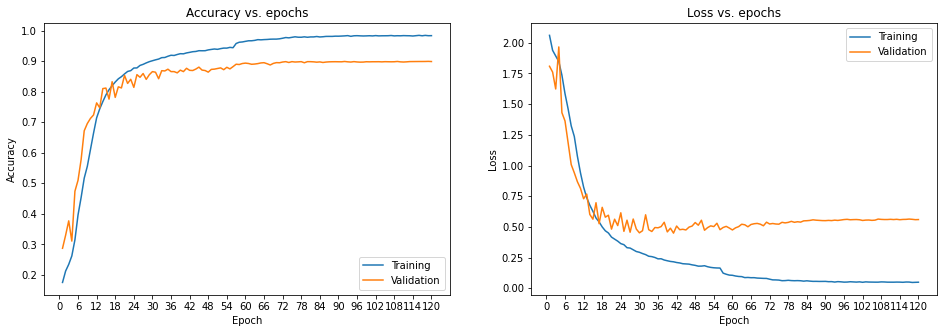

In [17]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.5589, Test Accuracy:89.92%
---------------------------------------- confusion matrix ----------------------------------------


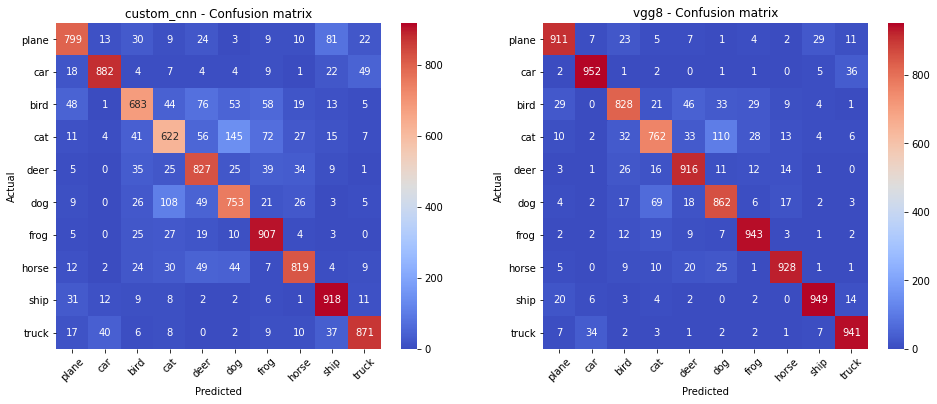

---------------------------------------- model improvement ----------------------------------------


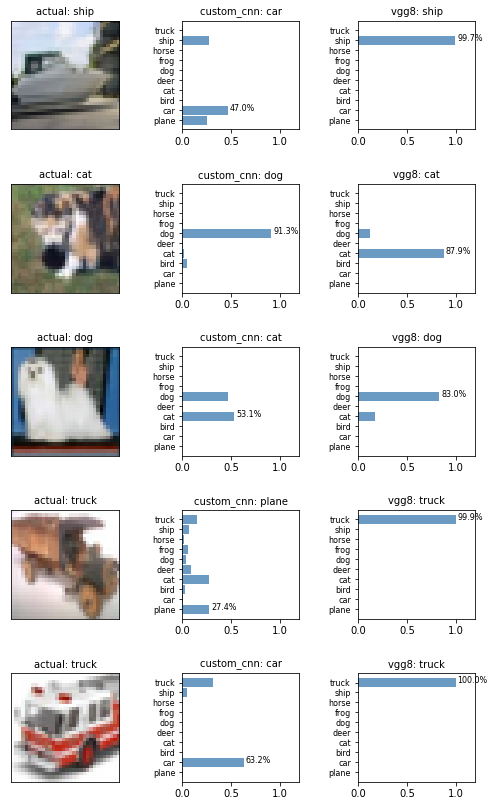

---------------------------------------- error analysis ----------------------------------------


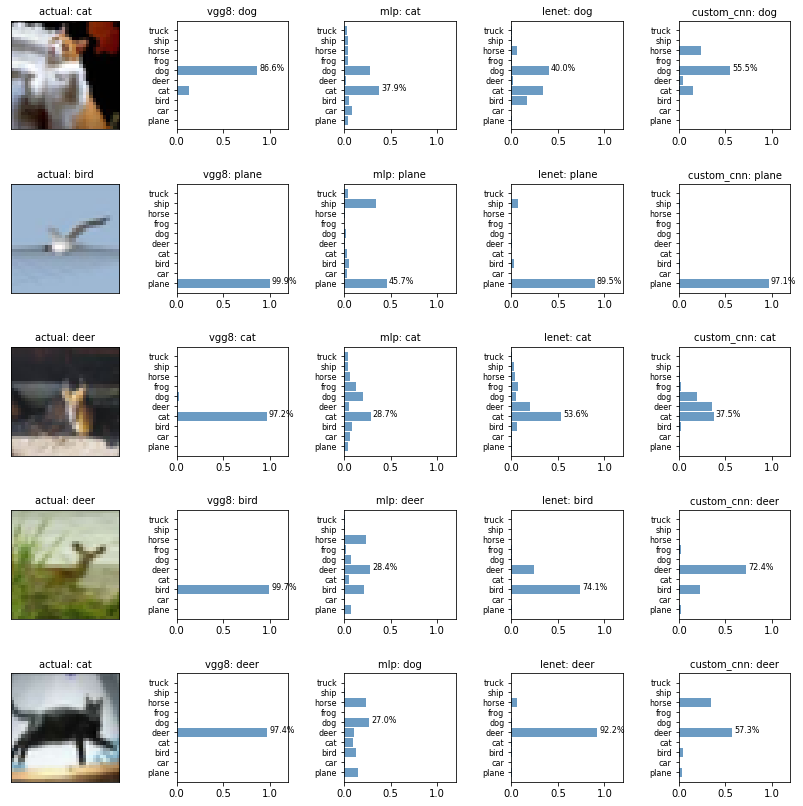

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.000465,1.0000,0.558937,0.8992,1672906,3026.0
custom_cnn,0.278233,0.9089,0.566326,0.8081,73738,1001.0
lenet,0.462399,0.8471,0.771559,0.7360,83170,725.0
mlp,1.661307,0.4071,1.714949,0.3900,394634,444.0


In [18]:
helper.model_summary(model, history=history)

## Resnet

参考https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter2-deep-networks/resnet-cifar10-2.2.1.py

In [19]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = layers.Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
    else:
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10, name='resnet_v1'):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = layers.Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = layers.add([x, y])
            x = layers.Activation('relu')(x)

        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = layers.AveragePooling2D(pool_size=7)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs, name=name)
    return model

def get_resnet_v1(helper, depth=32, name='resnet_v1'):       
    model = resnet_v1(helper.data.input_shape, depth=depth, name='{}_{}'.format(name, depth))
    helper.compile(model)
    return model

model = get_resnet_v1(helper, depth=20)
model.summary()

learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/resnet_v1_20/checkpoint
Model: "resnet_v1_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 32, 32, 16)   64          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization_5[0][0]      
_____

2020-12-25 15:11:53,617: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.4829 - accuracy: 0.5191 - val_loss: 1.6168 - val_accuracy: 0.5170
Epoch 2/120
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0715 - accuracy: 0.6797 - val_loss: 1.3394 - val_accuracy: 0.5985
Epoch 3/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.8986 - accuracy: 0.7448 - val_loss: 0.9811 - val_accuracy: 0.7172
Epoch 4/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.8016 - accuracy: 0.7810 - val_loss: 1.0170 - val_accuracy: 0.7136
Epoch 5/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7333 - accuracy: 0.8058 - val_loss: 0.9782 - val_accuracy: 0.7291
Epoch 6/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6824 - accuracy: 0.8258 - val_loss: 0.9166 - val_accuracy: 0.7573
Epoch 7/120
1562/1562 [==============================] - 28s 18ms/step 

Epoch 54/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.1219 - accuracy: 0.9987 - val_loss: 1.1336 - val_accuracy: 0.8297
Epoch 55/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.1186 - accuracy: 0.9992 - val_loss: 1.0873 - val_accuracy: 0.8331
Epoch 56/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.1159 - accuracy: 0.9992 - val_loss: 1.1213 - val_accuracy: 0.8285
Epoch 57/120
1562/1562 [==============================] - ETA: 0s - loss: 0.1141 - accuracy: 0.9990
Epoch 00057: ReduceLROnPlateau reducing learning rate to 3.1622778103685084e-05.
1562/1562 [==============================] - 28s 18ms/step - loss: 0.1141 - accuracy: 0.9990 - val_loss: 1.1343 - val_accuracy: 0.8308
Epoch 58/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.1106 - accuracy: 0.9996 - val_loss: 1.0619 - val_accuracy: 0.8353
Epoch 59/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.1085 - acc

2020-12-25 15:44:09,842: INFO: finish training [elapsed time: 1936.23 seconds]


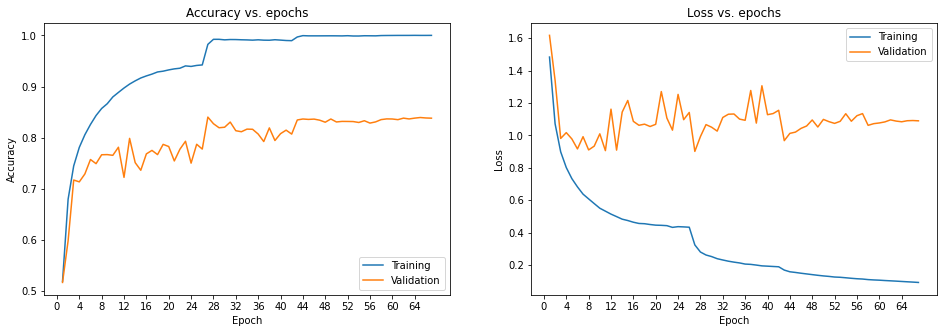

In [20]:
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.9012, Test Accuracy:84.02%
---------------------------------------- confusion matrix ----------------------------------------


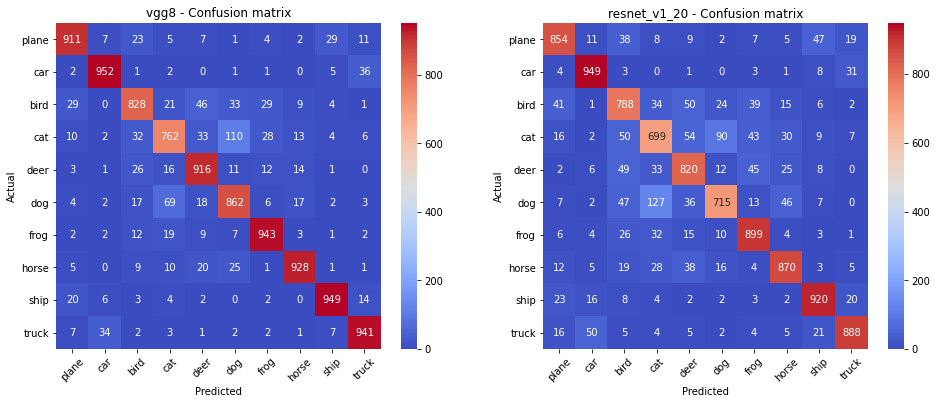

---------------------------------------- model improvement ----------------------------------------


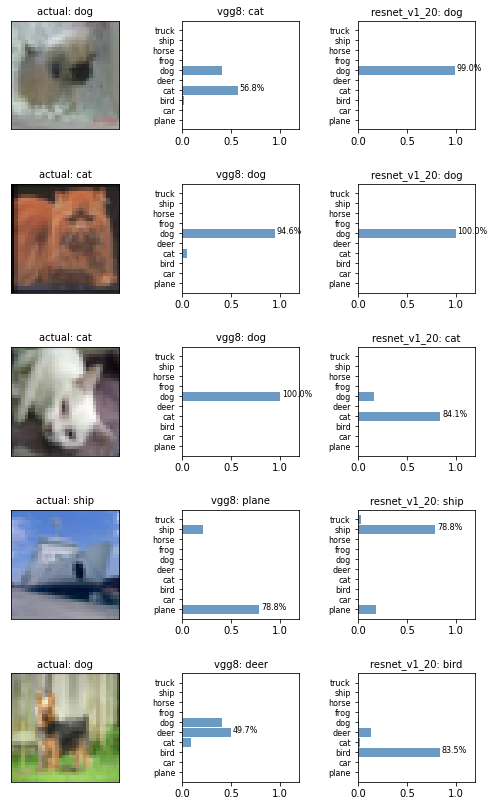

---------------------------------------- error analysis ----------------------------------------


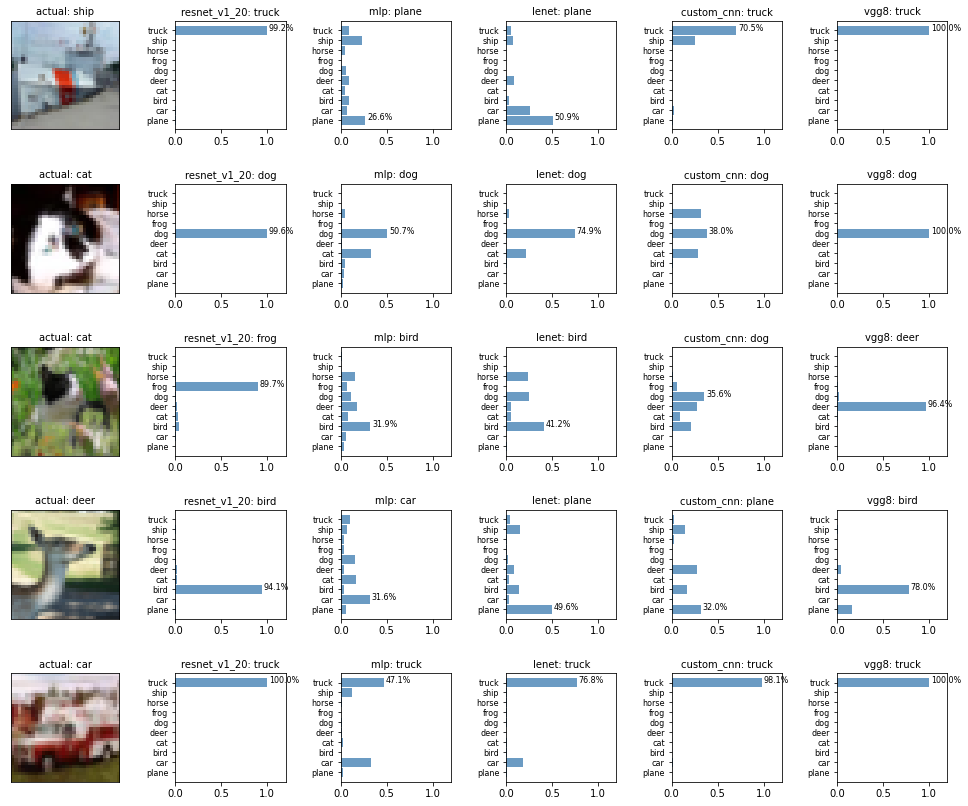

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.000465,1.0000,0.558937,0.8992,1672906,3026.0
resnet_v1_20,0.276873,0.9976,0.901230,0.8402,273066,1936.0
custom_cnn,0.278233,0.9089,0.566326,0.8081,73738,1001.0
lenet,0.462399,0.8471,0.771559,0.7360,83170,725.0
mlp,1.661307,0.4071,1.714949,0.3900,394634,444.0


In [21]:
helper.model_summary(model, history=history)

## 总结